## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

### Reading the DataSet

In [4]:
df= pd.read_csv("employee_promotion.csv")

In [5]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [7]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


### Data Analysis and Preprocessing

#### Null Values

In [8]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

<AxesSubplot:>

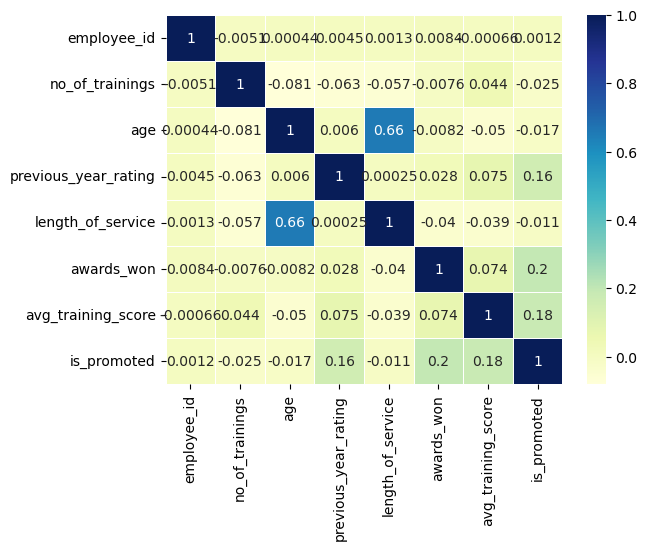

In [9]:
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

In [10]:
df['no_of_trainings'].unique()

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9], dtype=int64)

In [11]:
df['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

C:\Users\rajup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_of_trainings'>

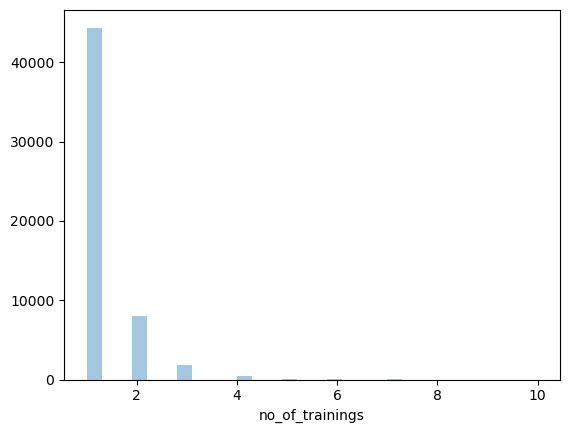

In [12]:
sns.distplot(df['no_of_trainings'],kde=False,bins=30)

<AxesSubplot:xlabel='previous_year_rating'>

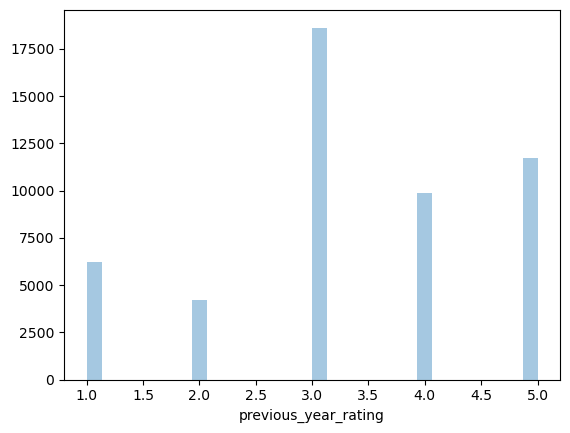

In [13]:
sns.distplot(df['previous_year_rating'],kde=False,bins=30)

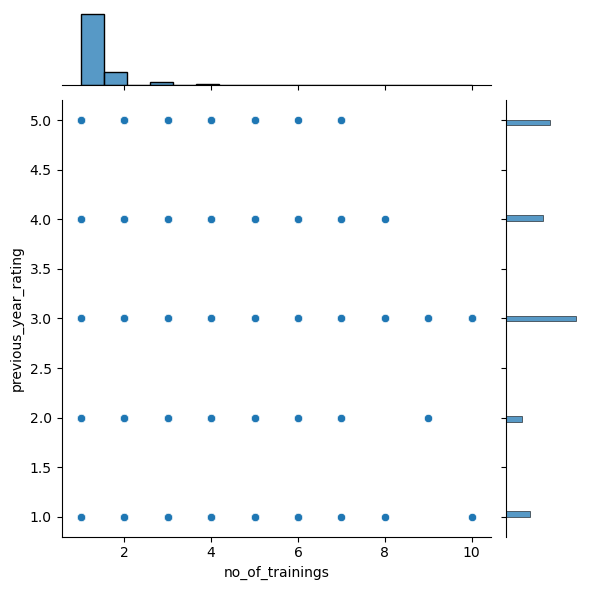

In [14]:
sns.jointplot(x="no_of_trainings", y="previous_year_rating", data=df)

In [15]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(pd.Series(np.where(df['no_of_trainings'] >= 7, random.randint(3,5), random.randint(1,2))))

<AxesSubplot:>

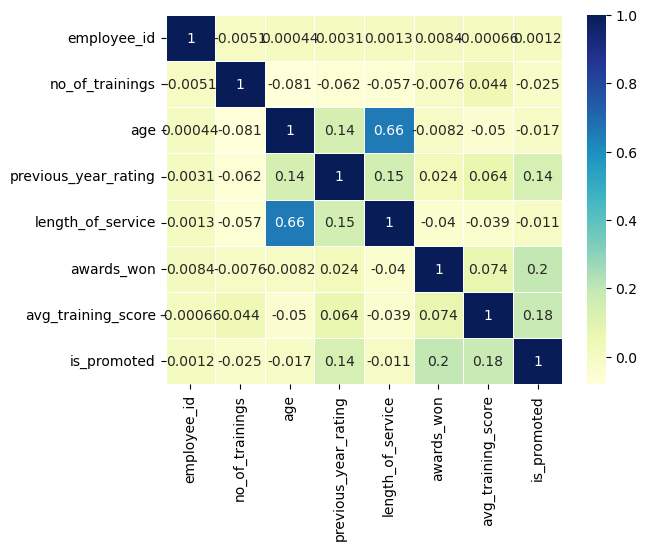

In [16]:
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

In [17]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [18]:
df['previous_year_rating'].unique()

array([5., 3., 1., 4., 2.])

In [19]:
df['awards_won'].unique()

array([0, 1], dtype=int64)

In [20]:
df['avg_training_score'].unique()

array([49., 60., 50., 73., 85., 59., 63., 83., 54., 77., 80., 84., 51.,
       46., 75., 57., 70., 68., 79., 44., 72., nan, 48., 58., 87., 47.,
       52., 88., 71., 65., 62., 53., 78., 91., 82., 69., 55., 74., 86.,
       90., 92., 67., 89., 56., 76., 81., 64., 39., 94., 93., 66., 95.,
       42., 96., 40., 99., 43., 97., 41., 98.])

In [21]:
df['avg_training_score'] = df['avg_training_score'].fillna(pd.Series(np.where(((df['previous_year_rating'] >= 3) | (df['awards_won'] == 1)), random.randint(3,5), random.randint(1,2))))

In [22]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [23]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52394,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
52395,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
52396,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
52397,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0


In [24]:
df.drop(columns=['employee_id'], inplace=True)
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


### Dividing features

In [25]:
num_features=[i for i in df.columns if df.dtypes[i]!='object']
num_features

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted']

In [26]:
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
df[cat_features].nunique()

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

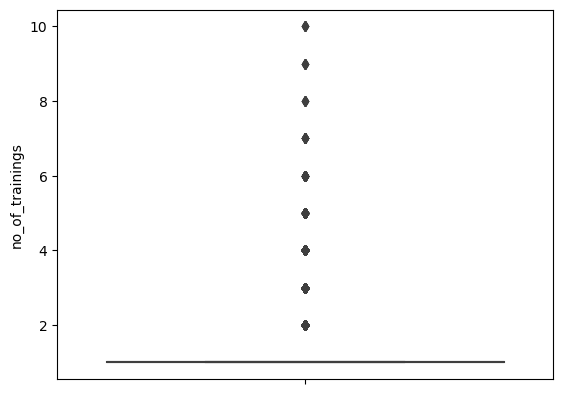

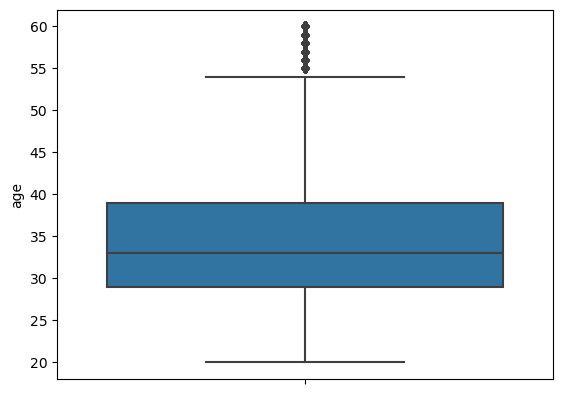

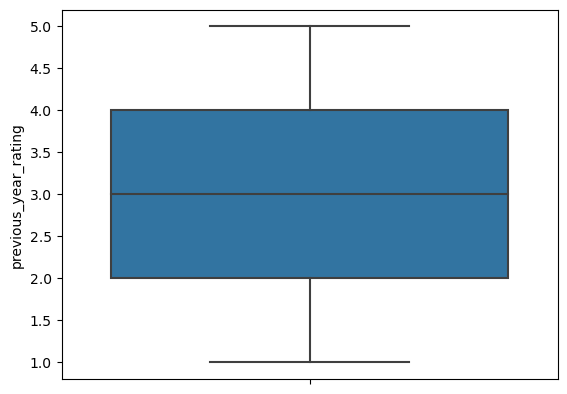

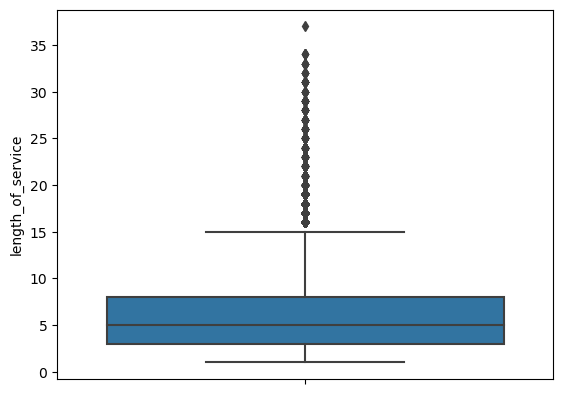

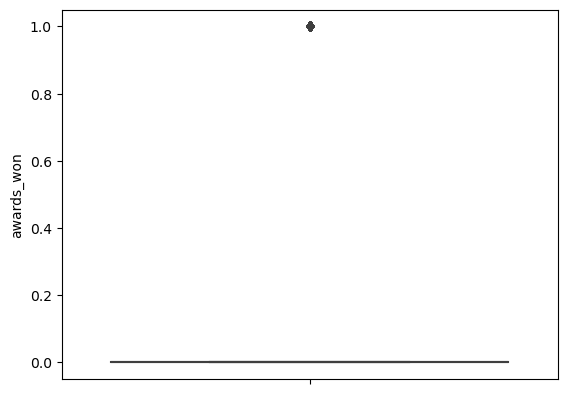

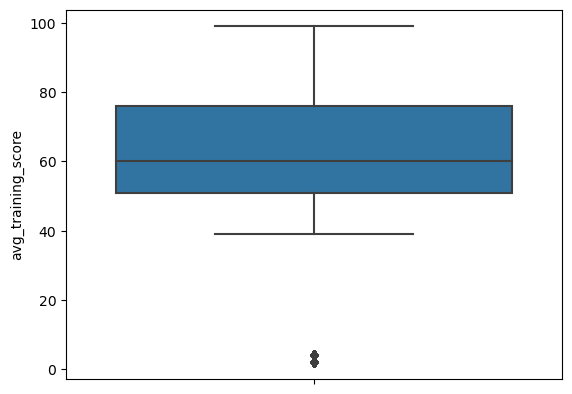

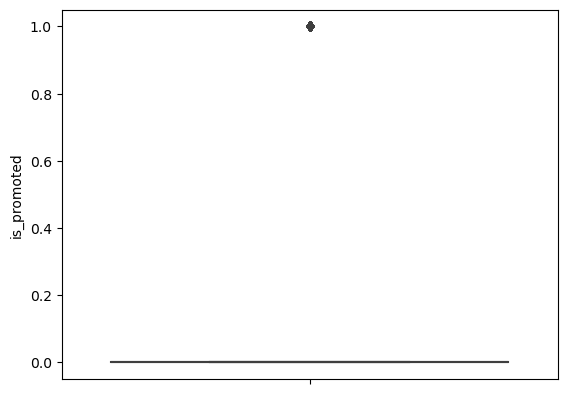

In [27]:
for i in num_features:
    plt.figsize=(10,5)
    sns.boxplot(y=df[i])
    plt.show()

C:\Users\rajup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rajup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rajup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

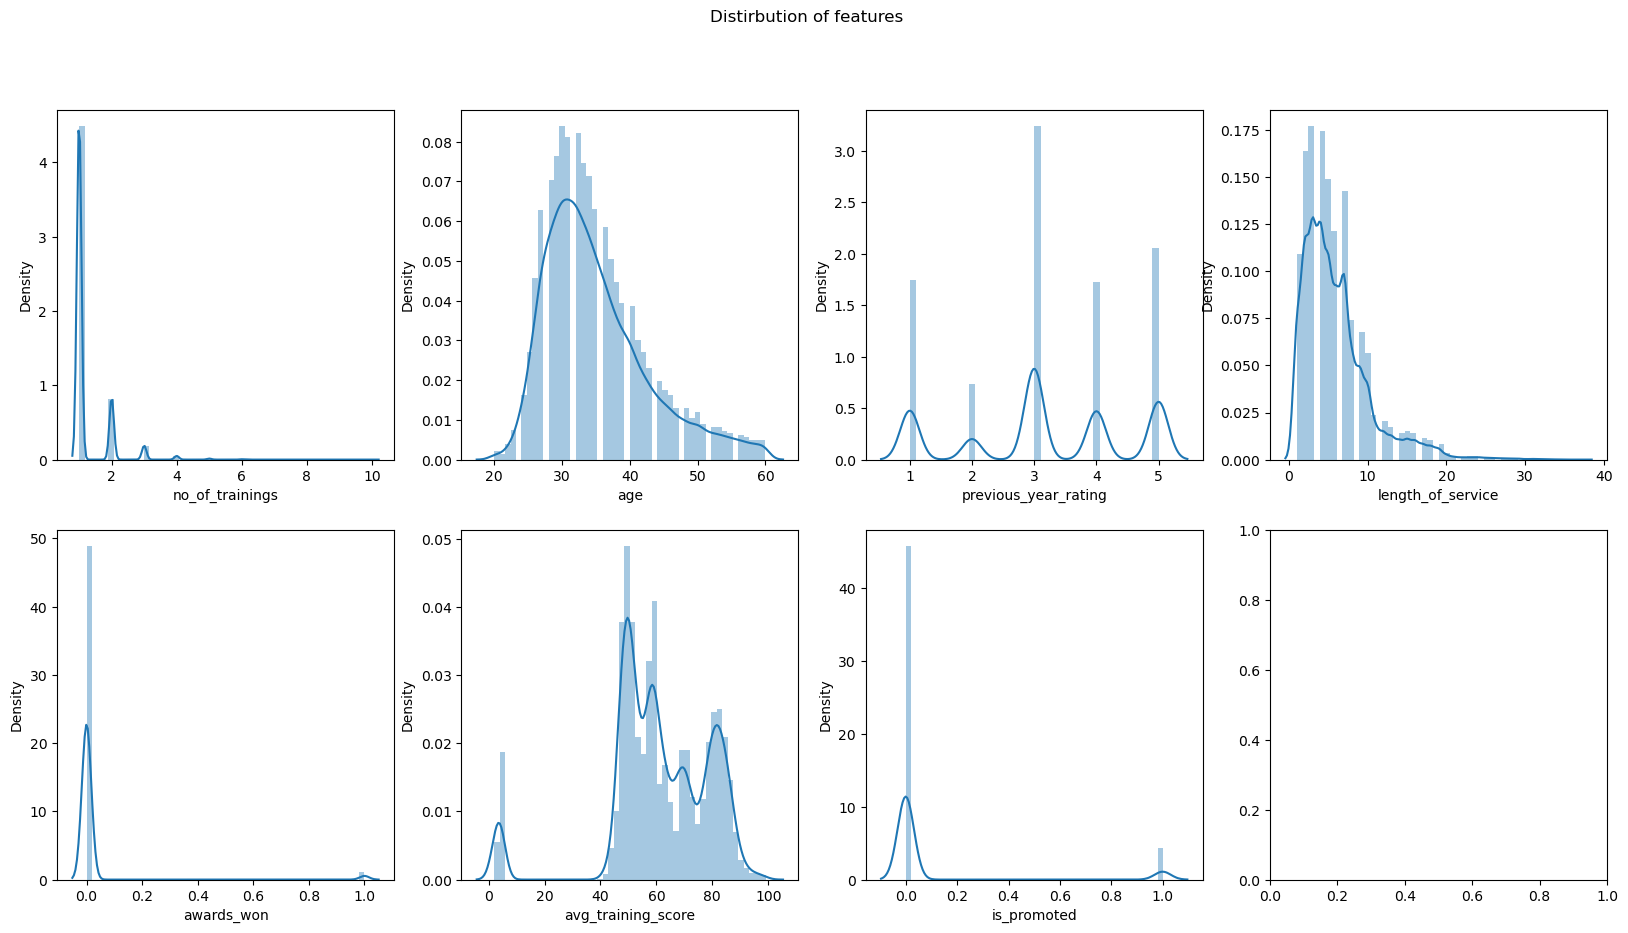

In [28]:
columns = [ 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(df[columns]):
    row = int(i/4)
    col = i%4
    sns.distplot(df[columns].iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout

### Plotting Q-Q Plot

In [29]:
import scipy.stats as stat
import pylab

In [30]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [31]:
columns

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted']

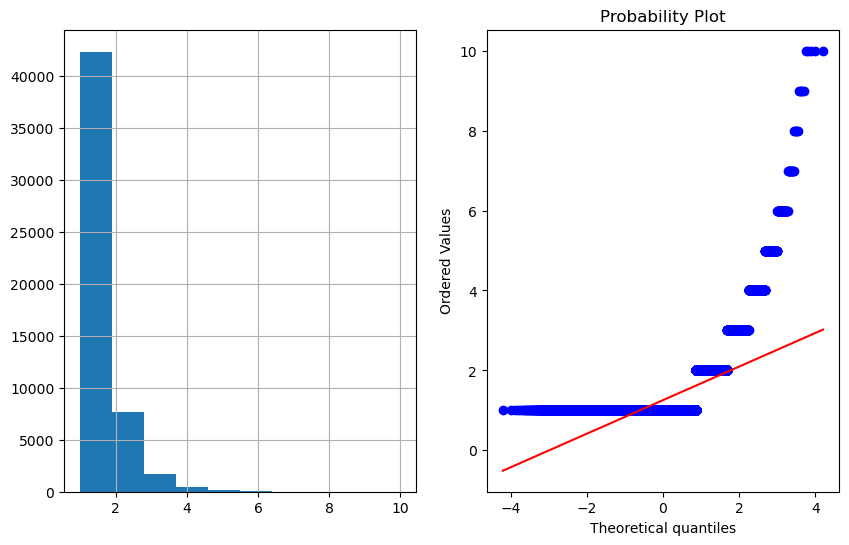

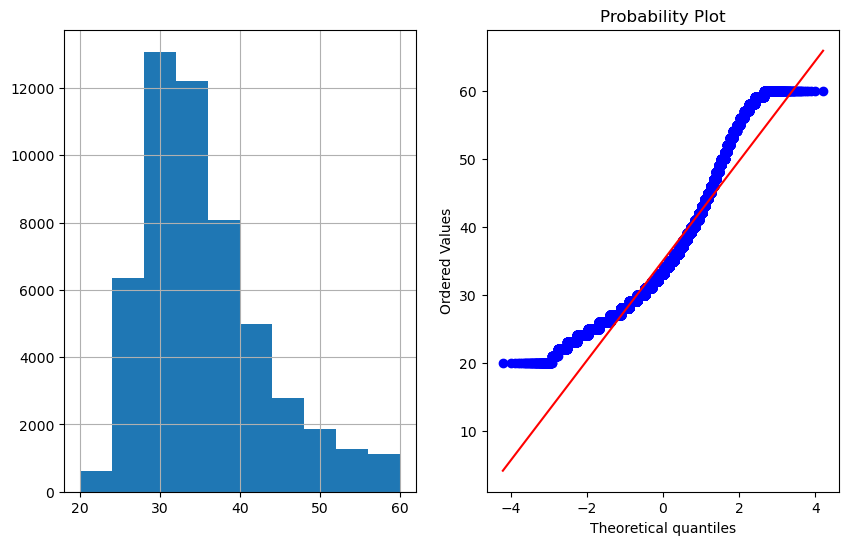

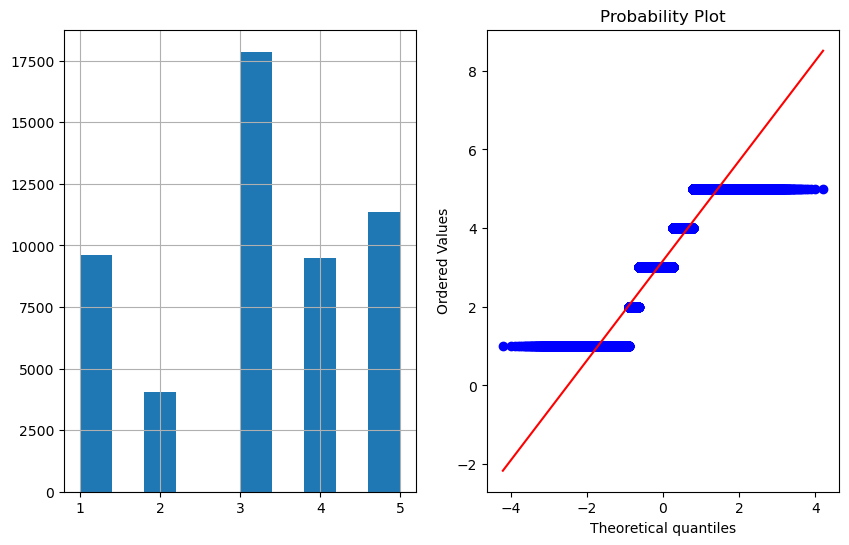

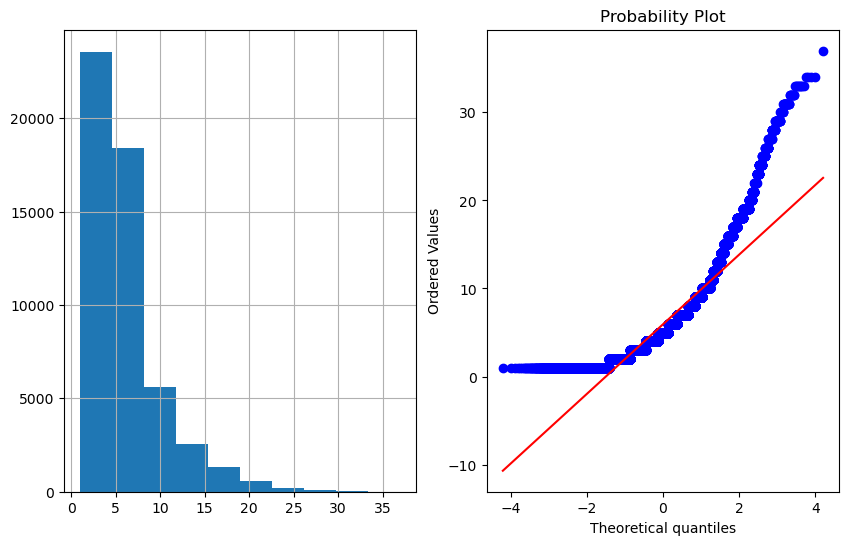

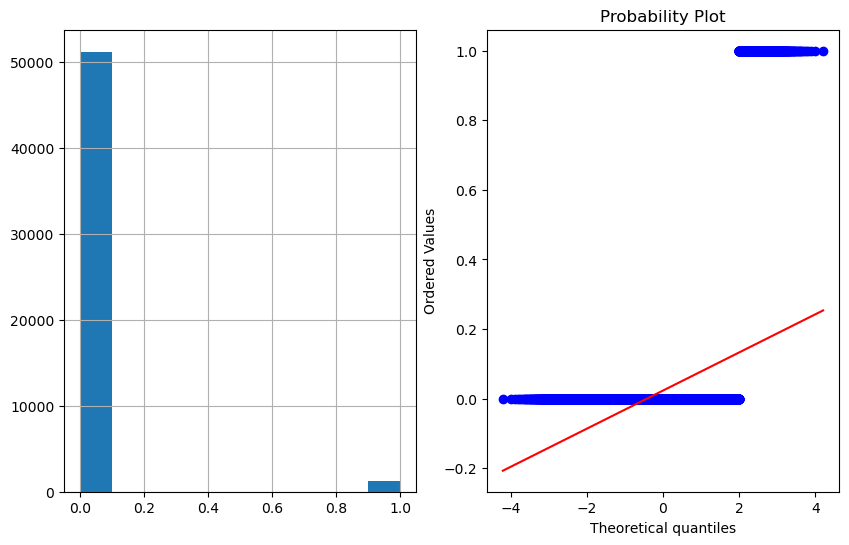

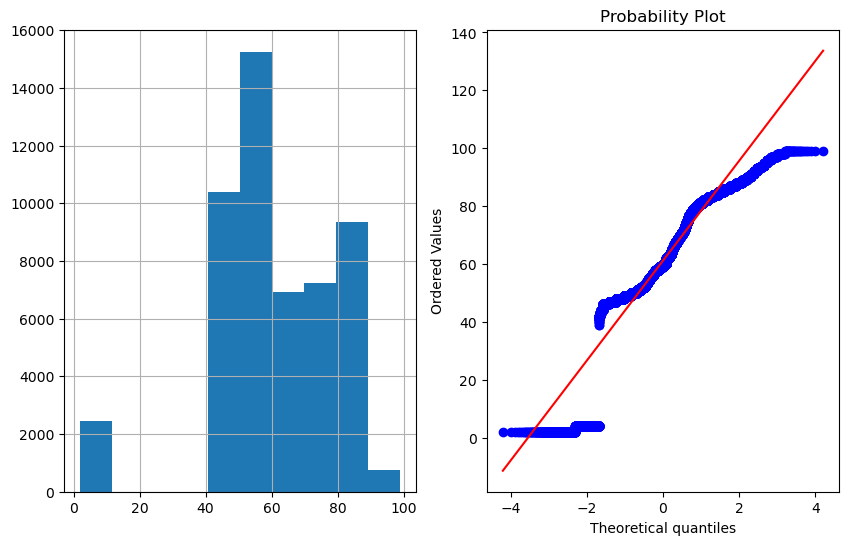

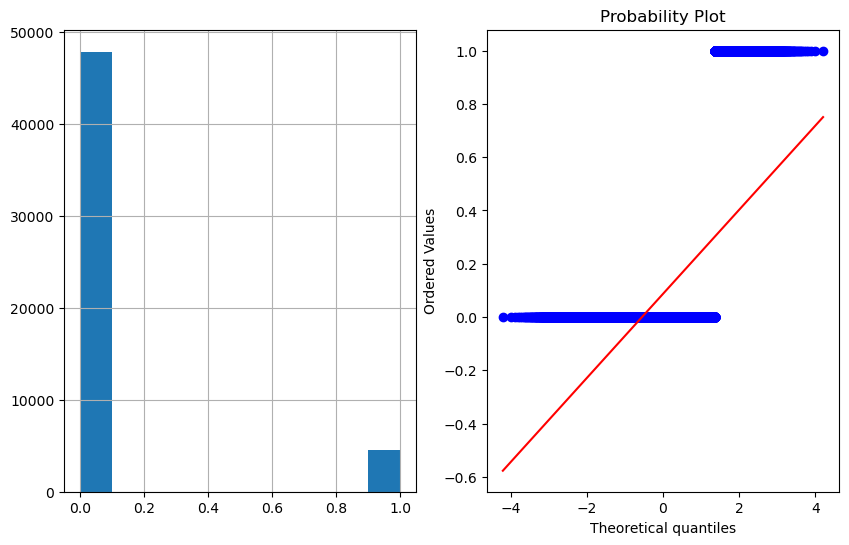

In [32]:
for feature in columns:
    plot_curve(df,feature)

### We need to do log transformation

In [33]:
age_log = np.log1p(df['age'])
service_log = np.log1p(df['length_of_service'])
score_log = np.log1p(df['avg_training_score'])

df.insert(6, 'age_log', age_log)
df.insert(9, 'length_of_service_log', service_log)
df.insert(12, 'avg_training_score_log', score_log)

df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0


C:\Users\rajup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rajup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rajup\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

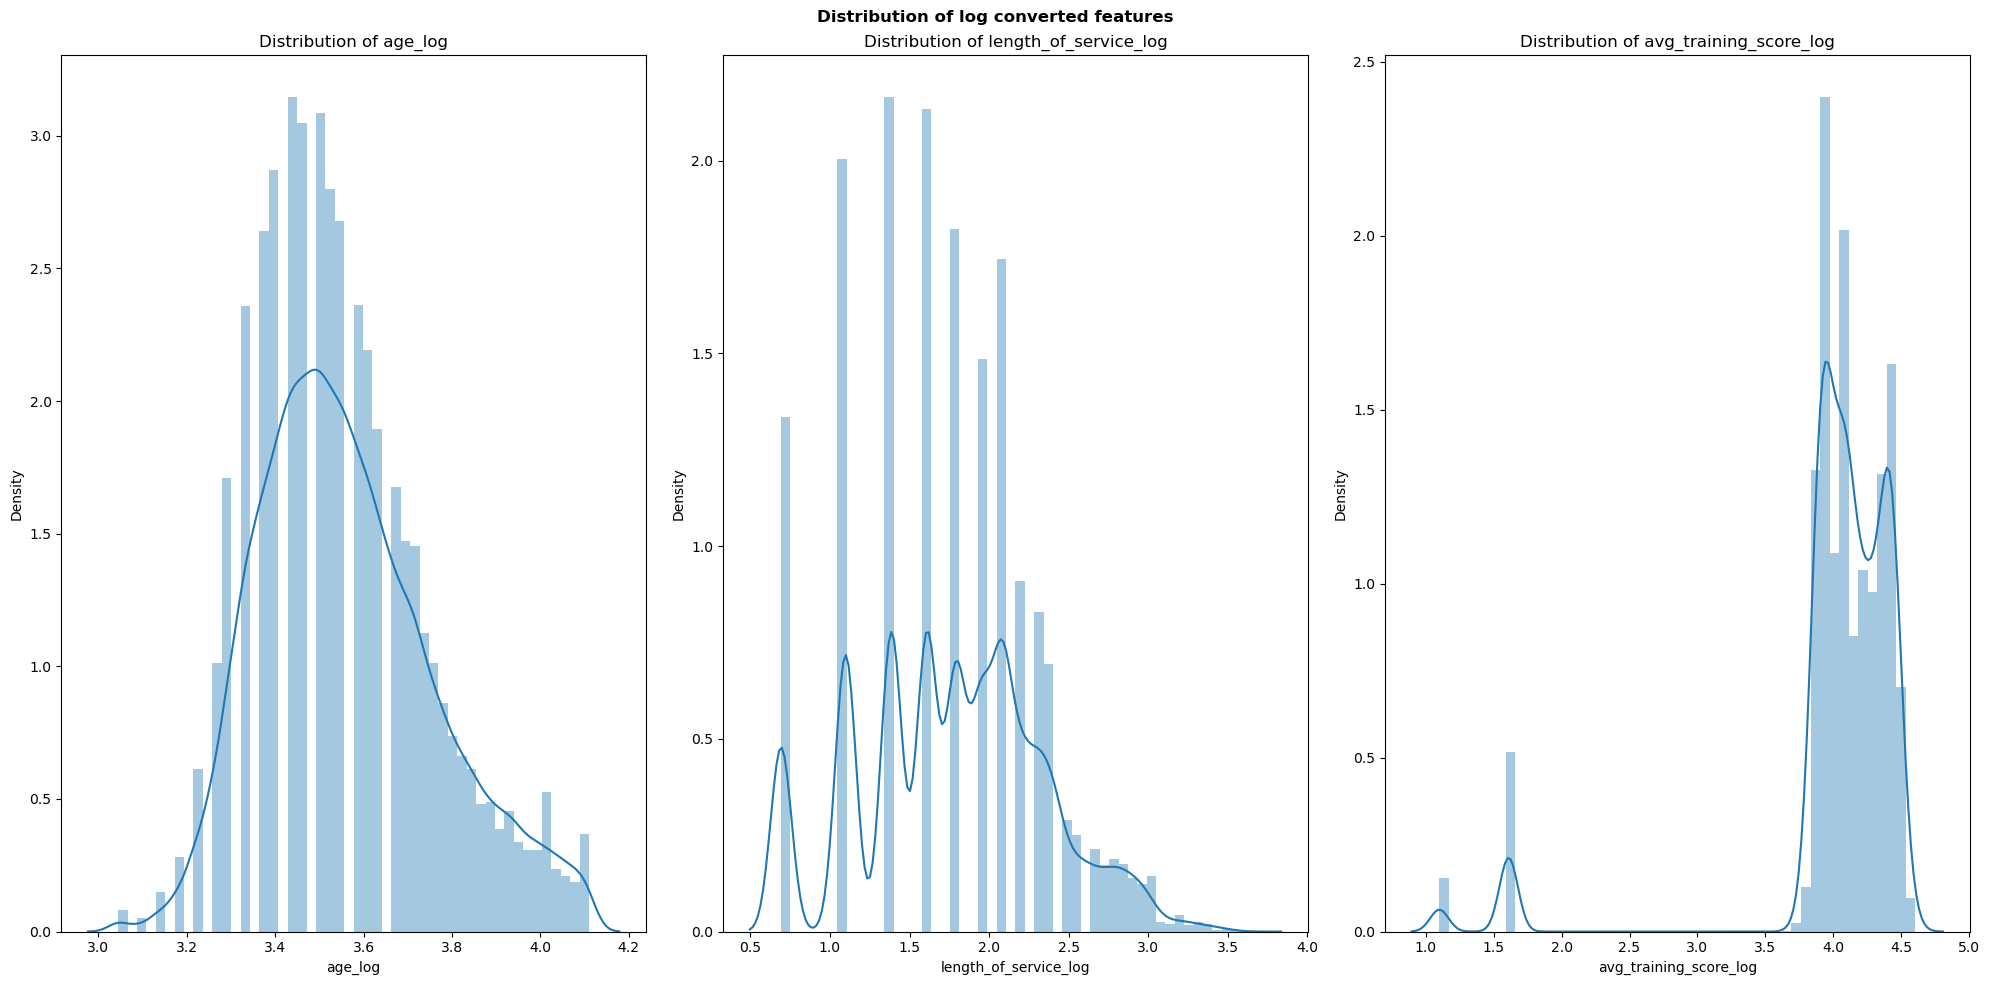

In [34]:
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

sns.distplot(df['age_log'], ax=ax1)
ax1.set_title('Distribution of age_log')
sns.distplot(df['length_of_service_log'], ax=ax2)
ax2.set_title('Distribution of length_of_service_log')
sns.distplot(df['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribution of avg_training_score_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

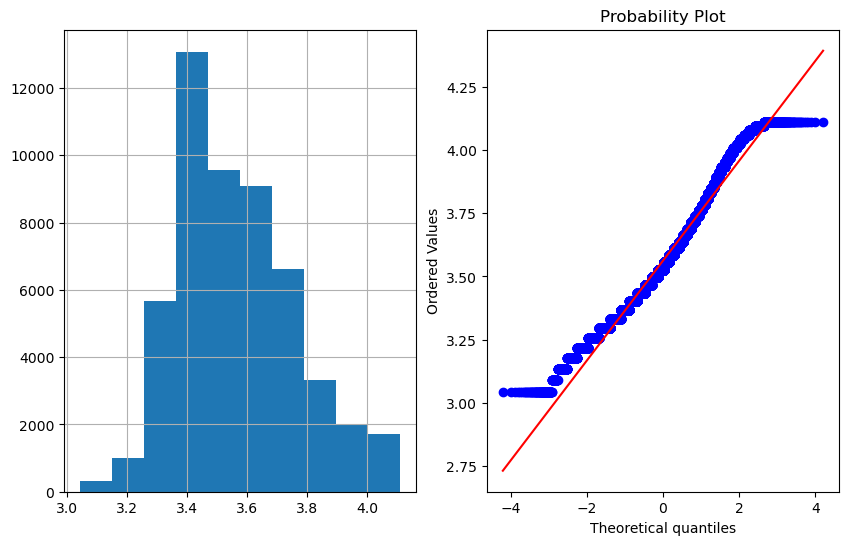

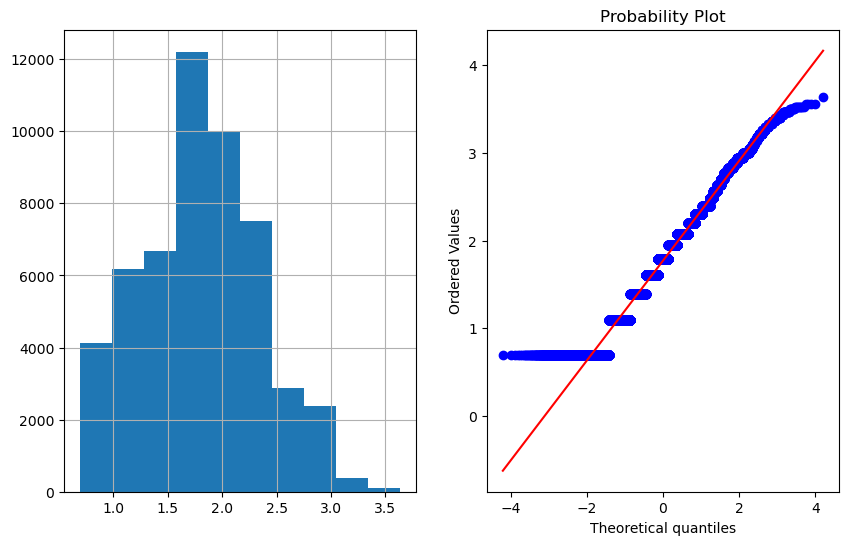

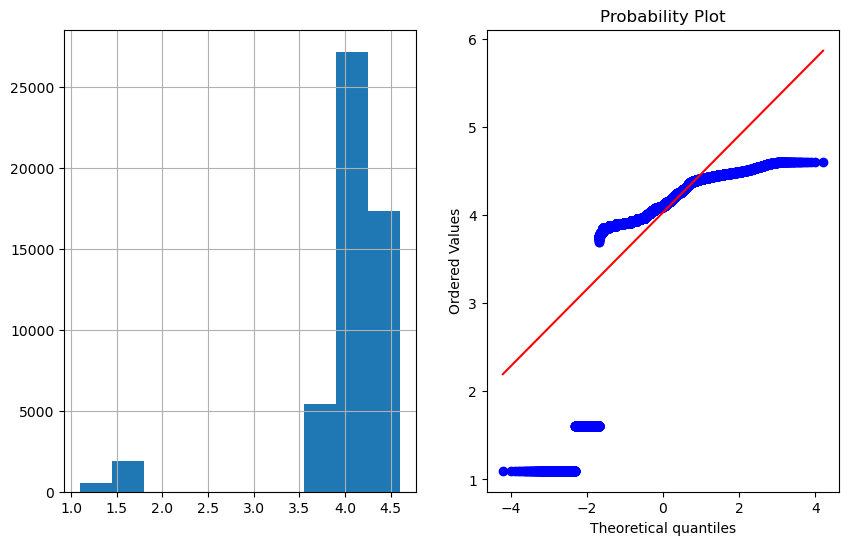

In [35]:
for feature in log_columns:
    plot_curve(df,feature)

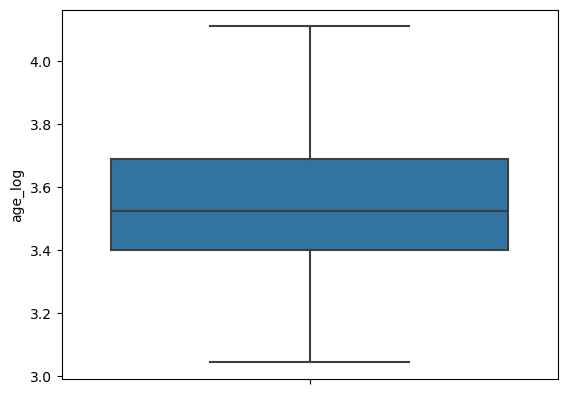

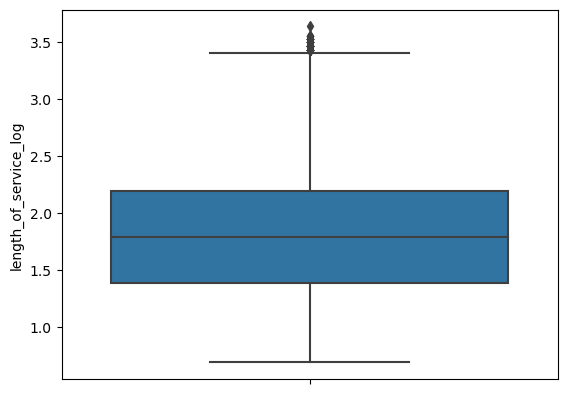

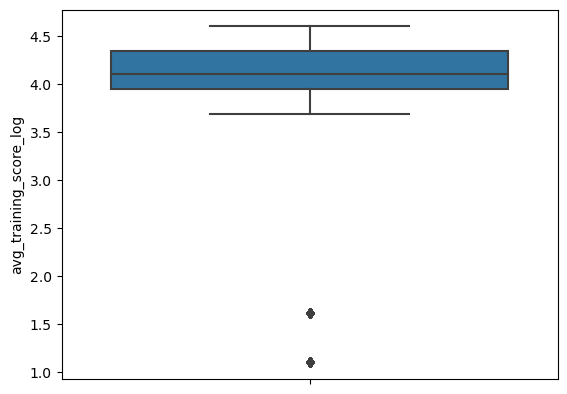

In [36]:
for i in log_columns:
    plt.figsize=(10,5)
    sns.boxplot(y=df[i])
    plt.show()

<AxesSubplot:title={'center':'Correlation of features'}>

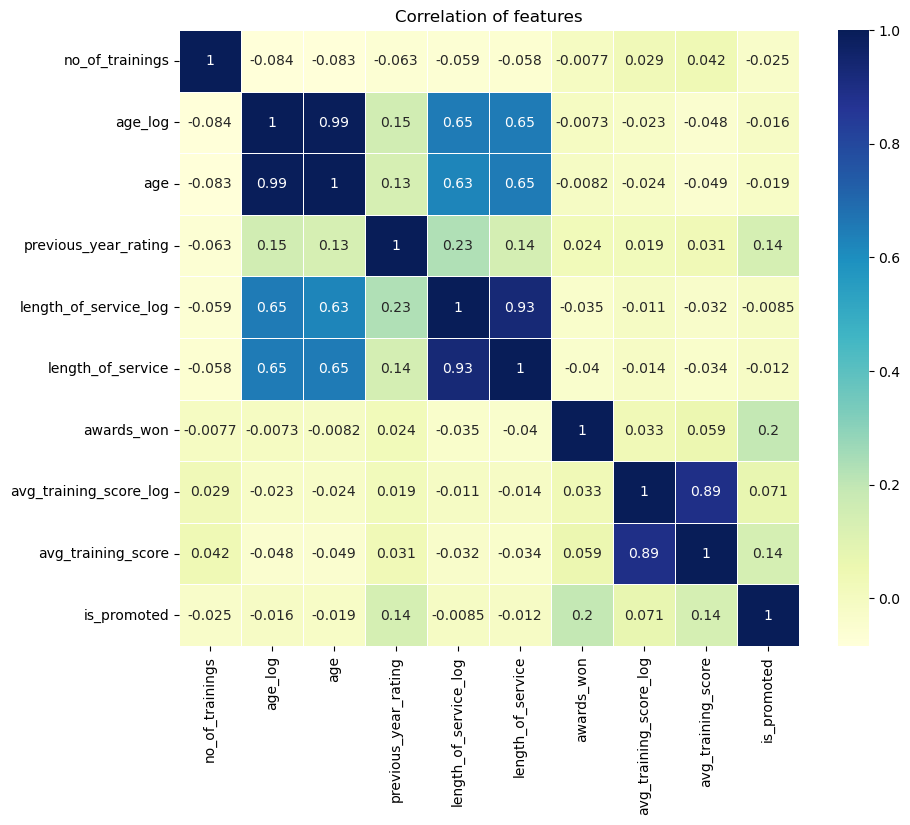

In [37]:
plt.figure(figsize=(10, 8))
plt.title('Correlation of features')
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

### One Hot Encoding

In [38]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0,...,0,0,1,0,0,0,1,0,0,1
3,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0,...,0,0,1,0,0,0,1,1,0,0


### Scaling our Data

In [39]:
from sklearn.preprocessing import StandardScaler
features = np.array(df_encoded.columns).reshape(-1, 1)

for feature in features:
    scaler = StandardScaler()
    scaler.fit(df_encoded[feature])
    df_encoded[feature] = scaler.transform(df_encoded[feature])

df_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.417644,0.106110,0.002595,1.351449,0.740805,0.483454,-0.154006,-0.192926,-0.661023,-0.30822,...,-0.111374,-0.084558,-1.526811,-0.12491,1.584557,1.513667,-1.513667,-1.115895,-0.148729,1.166143
1,-0.417644,-0.641587,-0.653667,1.351449,-0.278416,-0.451912,-0.154006,0.138986,-0.060845,-0.30822,...,-0.111374,-0.084558,0.654960,-0.12491,-0.631091,-0.660647,0.660647,0.896141,-0.148729,-0.857528
2,-0.417644,-0.034751,-0.128657,-0.126441,0.536569,0.249613,-0.154006,-0.159872,-0.606461,-0.30822,...,-0.111374,-0.084558,0.654960,-0.12491,-0.631091,-0.660647,0.660647,-1.115895,-0.148729,1.166143
3,1.212457,0.632940,0.527604,-1.604331,1.088767,0.951137,-0.154006,-0.159872,-0.606461,-0.30822,...,-0.111374,-0.084558,0.654960,-0.12491,-0.631091,-0.660647,0.660647,0.896141,-0.148729,-0.857528
4,-0.417644,1.331785,1.315118,-0.126441,-1.164186,-0.919595,-0.154006,0.461451,0.648457,-0.30822,...,-0.111374,-0.084558,0.654960,-0.12491,-0.631091,-0.660647,0.660647,0.896141,-0.148729,-0.857528


### Spllitting the data

In [40]:
x = df_encoded.drop(columns=['is_promoted'], inplace=False)
y = df_encoded['is_promoted'].astype(int)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [42]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (41919, 60)
Shape of X_test:  (10480, 60)
Shape of y_train:  (41919,)
Shape of y_test:  (10480,)


## Model Development:

### We will use the following models in this project:
- Decison Tree Classifier
- Random Forest Classifer 
- Logistic Regression
- SVM

### Defining a function which will give the different accuracy metrics

In [43]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve

In [123]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="macro")
    recall = recall_score(y_test, pred, average="macro")
    f1 = f1_score(y_test, pred, average="macro")
    if (pred_proba == None):
        roc_auc = 0
    elif(len(pred_proba) != 0):
        roc_auc = roc_auc_score(y_test, pred_proba, average="macro")
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Decision Tree

In [100]:
dt_clf = DecisionTreeClassifier()

In [101]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

In [102]:
dt_pred_proba

array([0., 0., 0., ..., 0., 0., 0.])

In [103]:
get_clf_eval(y_test, dt_pred, dt_pred_proba)

Confusion Matrix
[[8906  690]
 [ 512  372]]
Accuracy: 0.8853, Precision: 0.6480, Recall 0.6745, F1: 0.6596, AUC:0.6744


C:\Users\rajup\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


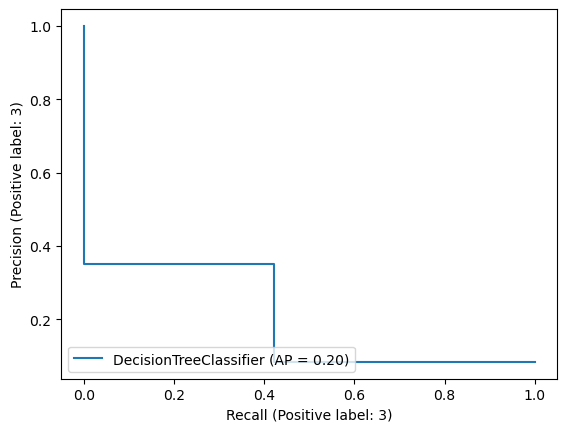

In [104]:
plot_precision_recall_curve(dt_clf, X_test, y_test)

## Logistic Regression

In [105]:
lr_clf = LogisticRegression()

In [106]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [107]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)

Confusion Matrix
[[9588    8]
 [ 650  234]]
Accuracy: 0.9372, Precision: 0.9517, Recall 0.6319, F1: 0.6912, AUC:0.7933


C:\Users\rajup\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


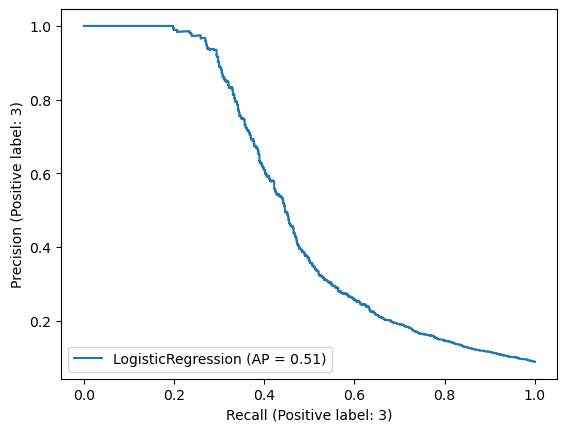

In [108]:
plot_precision_recall_curve(lr_clf, X_test, y_test)

## Random Forest

In [109]:
rf_clf = RandomForestClassifier()

In [110]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

In [111]:
get_clf_eval(y_test, rf_pred, rf_pred_proba)

Confusion Matrix
[[9560   36]
 [ 598  286]]
Accuracy: 0.9395, Precision: 0.9147, Recall 0.6599, F1: 0.7211, AUC:0.7796


C:\Users\rajup\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


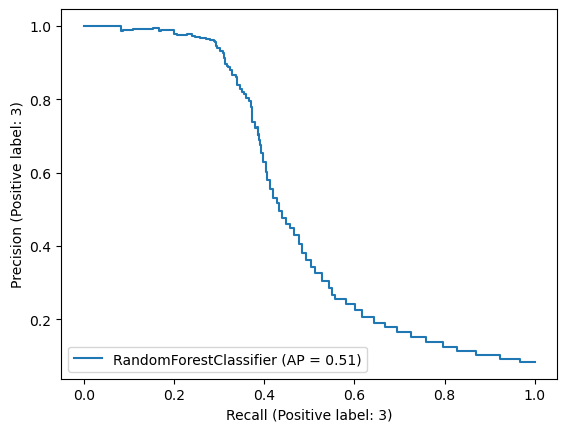

In [112]:
plot_precision_recall_curve(rf_clf, X_test, y_test)

## Support Vector Machine

In [113]:
from sklearn.svm import SVC

In [114]:
svm_clf = SVC()

In [115]:
svm_clf

SVC()

In [116]:
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

In [124]:
get_clf_eval(y_test, svm_pred)

Confusion Matrix
[[9590    6]
 [ 761  123]]
Accuracy: 0.9268, Precision: 0.9400, Recall 0.5693, F1: 0.6022, AUC:0.0000


C:\Users\rajup\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


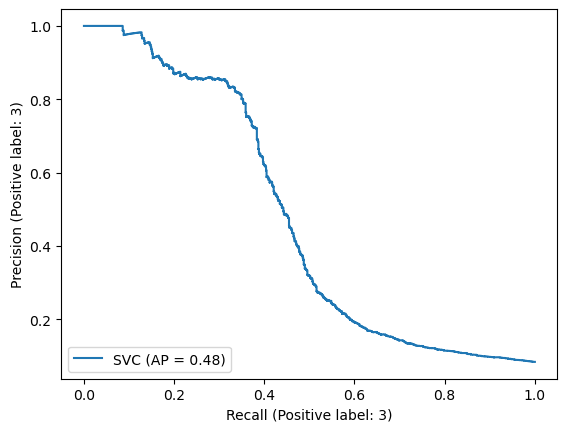

In [125]:
plot_precision_recall_curve(svm_clf, X_test, y_test)

<AxesSubplot:>

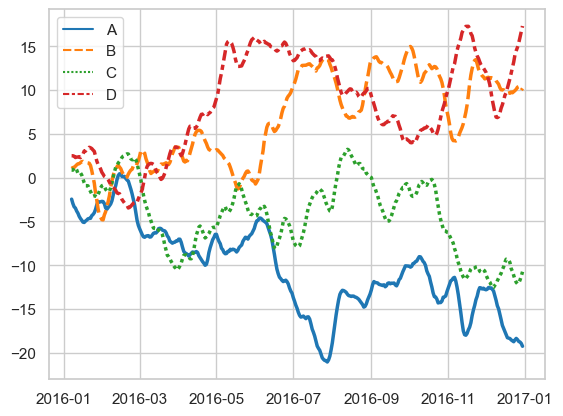

In [126]:
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)